<a href="https://colab.research.google.com/github/MAgustin1/comp_vision_1/blob/main/TP_2_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy import signal
import scipy.stats as st
import math 

In [2]:
def create_gauss_filter_a(h,w,k_size,sigma):
  # kernel gaussiano
  kernel_x = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
  kernel_y = kernel_x.T
  kernel = kernel_x * kernel_y

  filtro_gaussiano = np.zeros((h,w))
  centro_x = int(w/2)
  centro_y = int(h/2)

  for i in range(k_size):
    for j in range(k_size):
      filtro_gaussiano[centro_y - int(k_size/2) + i][centro_x - int(k_size/2) + j] = kernel[i][j]
  
  #transformada de fourier
  transformada = np.fft.fft2(filtro_gaussiano)

  return filtro_gaussiano , transformada

kernel


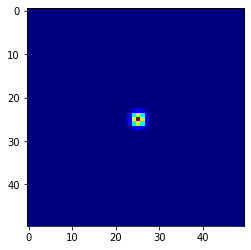

fft kernel


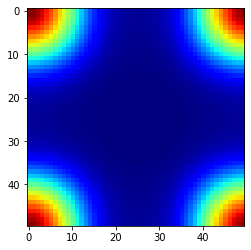

In [3]:
kernel, kernel_tf = create_gauss_filter_a(50, 50, k_size=5, sigma=1)
print("kernel")
plt.imshow(kernel, cmap= 'jet')
plt.show()
print("fft kernel")
plt.imshow(abs(np.fft.fft2(kernel)), cmap= 'jet')
plt.show()

kernel


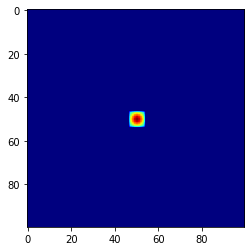

fft kernel


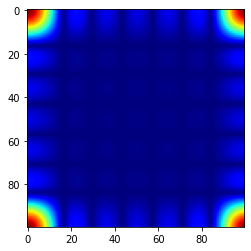

In [4]:
kernel, kernel_tf = create_gauss_filter_a(100, 100, k_size=7, sigma=3)
print("kernel")
plt.imshow(kernel, cmap= 'jet')
plt.show()
print("fft kernel")
plt.imshow(abs(np.fft.fft2(kernel)), cmap= 'jet')
plt.show()

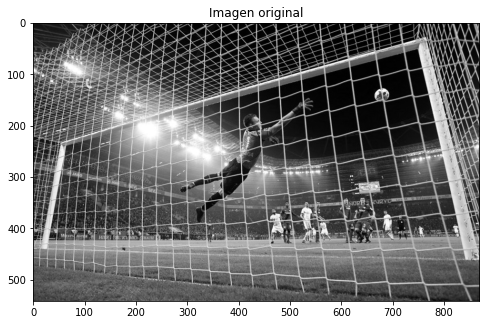

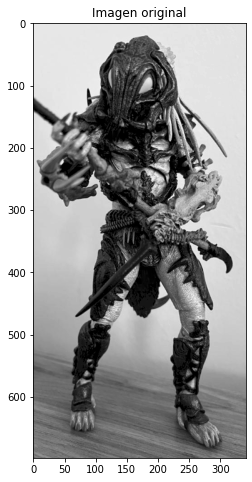

In [5]:
img = cv.imread('fft_alfa_pred.png', 0)
img2 = cv.imread('golazo.jpg', 0)

img_fft = np.fft.fft2(img2)
plt.figure(figsize=(8,8))
plt.imshow(img2, cmap='gray')
plt.title('Imagen original')
plt.show()

img_fft = np.fft.fft2(img)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()

k_size: 5 - sigma: 3


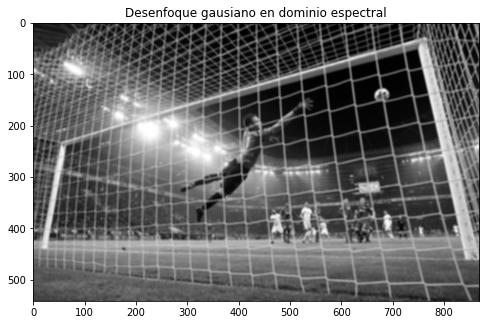

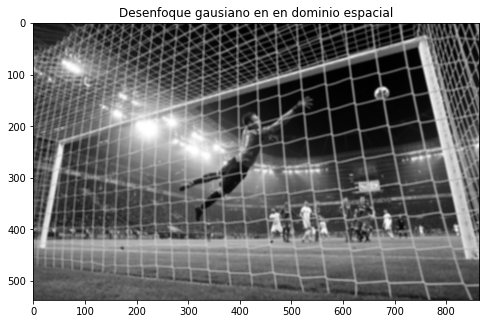

k_size: 5 - sigma: 5


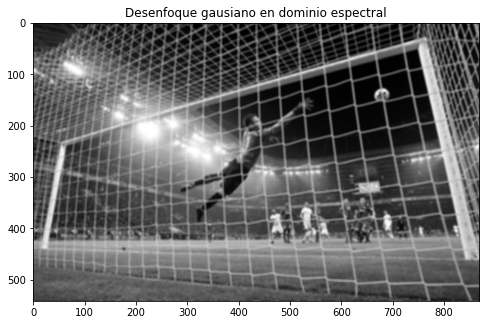

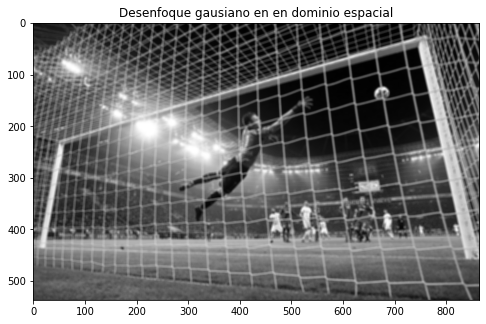

k_size: 15 - sigma: 3


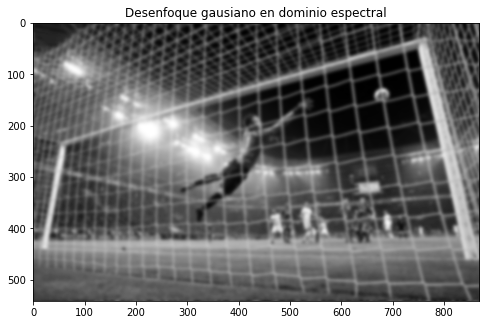

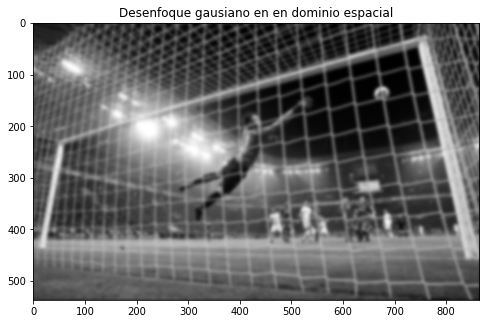

k_size: 15 - sigma: 5


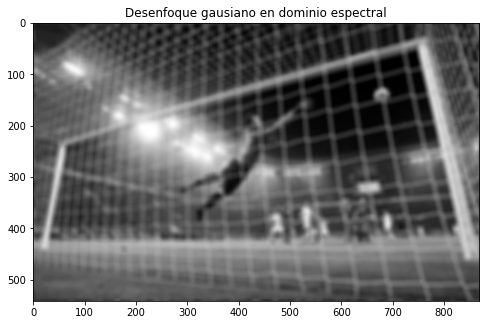

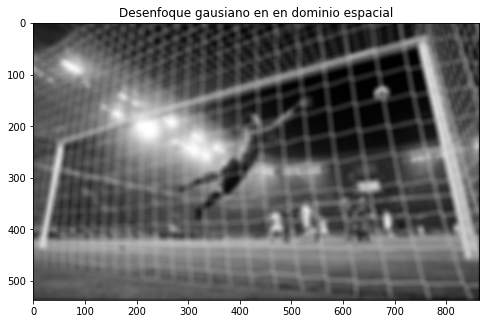

k_size: 21 - sigma: 3


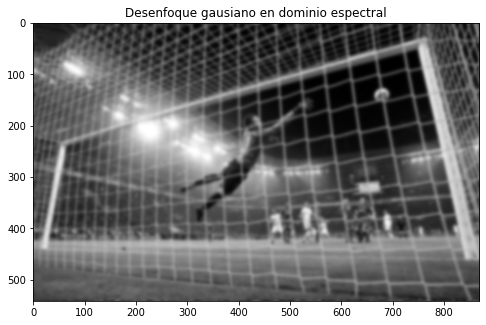

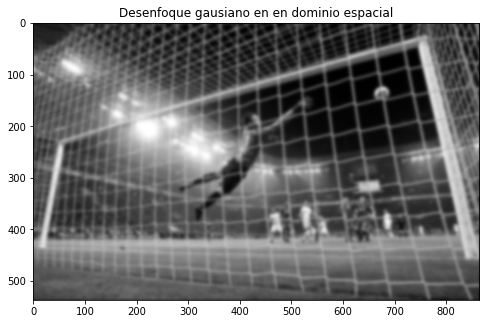

k_size: 21 - sigma: 5


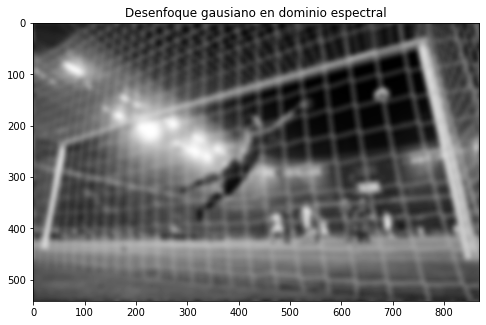

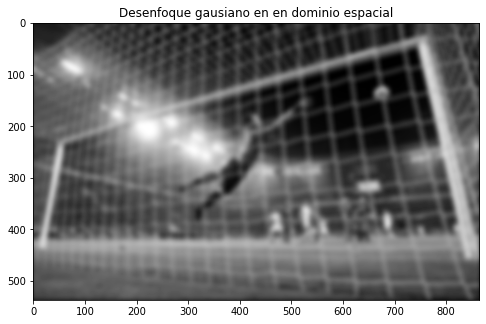

In [10]:
for k_size in [5, 15, 21]:
    for sigma in [3,5]:
        kernel, kernel_tf = create_gauss_filter_a(img2.shape[0], img2.shape[1], k_size=k_size, sigma=sigma)
        print("k_size: " + str(k_size) + " - sigma: " + str(sigma))
        filtered = img_fft * kernel_tf

        #img_gauss_spacial = np.real(np.fft.ifft2(np.fft.ifftshift(filtered)))
        spacial = signal.fftconvolve(img2, kernel, mode='same')

        img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

        plt.figure(figsize=(8,8))
        plt.imshow(img_gauss, cmap='gray')
        plt.title('Desenfoque gausiano en dominio espectral')
        plt.show()

        plt.figure(figsize=(8,8))
        plt.imshow(spacial[5:,5:], cmap='gray')
        plt.title('Desenfoque gausiano en en dominio espacial')
        plt.show()

En las imagenes se puede osvervar como a medida que aumenta el sigma aumenta el blur y cuando aumenta el tamaño del kernel se pierden más los detalles.

In [8]:
def im_measure (image):
  
  f = np.fft.fft2(image)
  
  fc = np.fft.fftshift(f)
  
  af = np.abs(fc)
 
  m = np.max(f)
  
  th = np.count_nonzero( f >= (m/1000) )
 
  fm = th / (image.shape[0] * image.shape[1])

  return fm

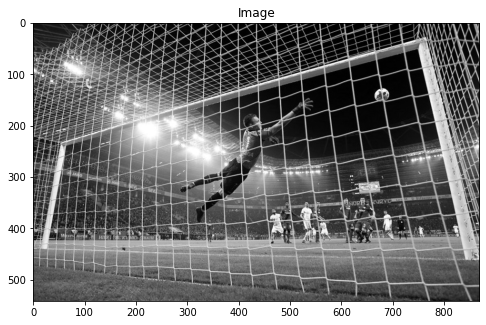

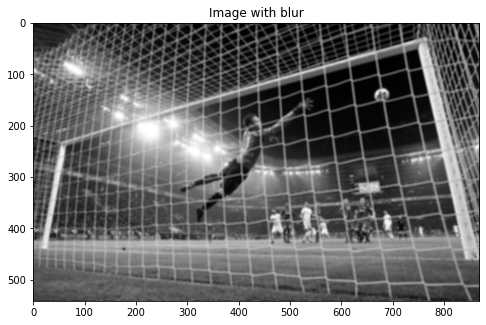

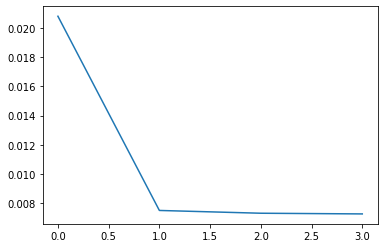

In [9]:
measures = []
img = cv.imread('golazo.jpg', 0)
measures.append(im_measure(img))

for sigma_i in [3,5,7]:
    kernel, kernel_tf = create_gauss_filter_a(img.shape[0], img.shape[1], k_size=5, sigma=sigma_i)

    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    
    measures.append(im_measure(img_gauss))


plt.figure(figsize=(8,8))

plt.imshow(img, cmap='gray')
plt.title('Image')
plt.show()
plt.figure(figsize=(8,8))

plt.imshow(img_gauss, cmap='gray')
plt.title('Image with blur')
plt.show()
plt.plot(measures)

En la grafica se puede ovservar que a medida que van aumentando los sigmas, la calidad de la imagen disminuye, por lo que las metricas y el difuminado de la imagen se corresponden.

# Parte 3